In [109]:
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys
sys.path.append("../")

In [189]:
tires = {"test_data":{"long":None, "lat":None}}

camber = 0 # default camber
pressure = 12* 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
run_num = 1

In [194]:
for name, tire in tires.items():
    
    df_braking = pd.read_csv(f"../tire_data/processed_data/braking_test.csv")
    # print(df_braking)
    tire["long"] = df_braking[((df_braking["velocity"] == velocity) & (df_braking["pressure"] == pressure) & (df_braking["camber"] == camber) )]
    # & (df_braking["SA"] == slip_angle)

    df_cornering = pd.read_csv(f"../tire_data/processed_data/cornering_test.csv")
    # print(df_cornering)
    tire["lat"] = df_cornering[((df_cornering["velocity"] == velocity) & (df_cornering["pressure"] == pressure) & (df_cornering["camber"] == camber) )]
    # & (df_cornering["SA"] == slip_angle)
    tire["lat"] = df_cornering


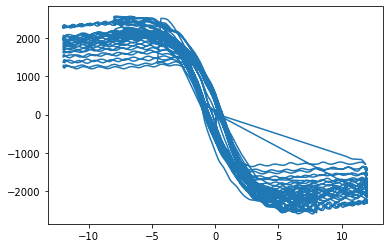

In [199]:
tire_1_df = [tire for _, tire in tires.items()][0]["long"]
temp_df = tire_1_df[tire_1_df["load"] == -250/0.224809]
# print(tire_1_df["SR"])
plt.plot(temp_df["SA"], temp_df["FY"])


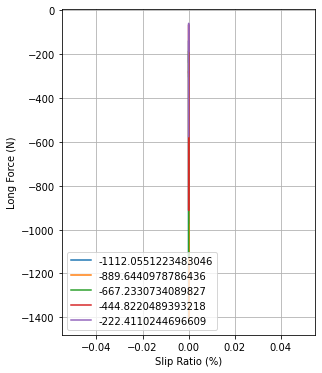

In [146]:
fig = plt.figure(figsize=(10,6))
count = 0
for name, tire in tires.items():
    if tire["long"] is not None:
        count += 1
        fig.add_subplot(1, 2, count)
        for load in tire["long"]["load"].unique():
            temp_df = tire["long"][tire["long"]["load"] == load]
            plt.plot(temp_df["SL"], temp_df["FX"], label = load)
        plt.legend()
        plt.ylabel("Long Force (N)")
        plt.xlabel("Slip Ratio (%)")
        plt.grid(True)
plt.show()